## Data Loading and preprocessing

In [4]:
import pandas as pd

In [5]:
file="C:\\Users\\tejag\\Downloads\\un-general-debates-blueprint (1).csv"

In [6]:
df=pd.read_csv(file)
df.head(20)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


## Importing nltk Package

In [7]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'doing', "doesn't", 'i', 'own', 'at', 'down', 'didn', 'in', 'on', 'its', 'out', 'haven', 'nor', "isn't", 'up', "that'll", 'each', "hadn't", 'very', 'myself', 'itself', 'of', 'him', 'we', 'yourself', 'there', 'only', "weren't", 'those', 's', 'same', 'ourselves', 'these', 'few', 'because', 'they', 'her', 'does', 'you', 'can', "should've", 'here', 'again', 'doesn', 'had', 'has', "won't", 'all', 'below', 'me', 'aren', 'yours', 'd', 'his', 'she', 'other', 'should', 'ain', 'be', 'it', 've', 're', 'shan', 'll', 'further', "hasn't", 'ma', 'after', 'hers', 'such', 'more', 'do', "didn't", 'about', "she's", 'don', 'before', 'from', 'so', 'did', 'm', 'y', 'what', 'who', 'herself', "couldn't", 'no', 'won', 'hadn', 'most', "haven't", 'or', 'against', 'now', 'needn', 'o', 'under', 'too', 'both', 'just', "it's", "shan't", 'which', "aren't", 'was', 'the', 'your', 'for', 'have', 'than', "wasn't", 'he', 'been', 'while', 'if', 'hasn', "needn't", 'them', 'off', 'whom', "mightn't", 'an', "mustn't", 'are', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Pre Processing Pipeline

In [8]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text 
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

## Token Frequency Analysis and Visualization

## Counting The Tokens

In [9]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


## Wordclouds

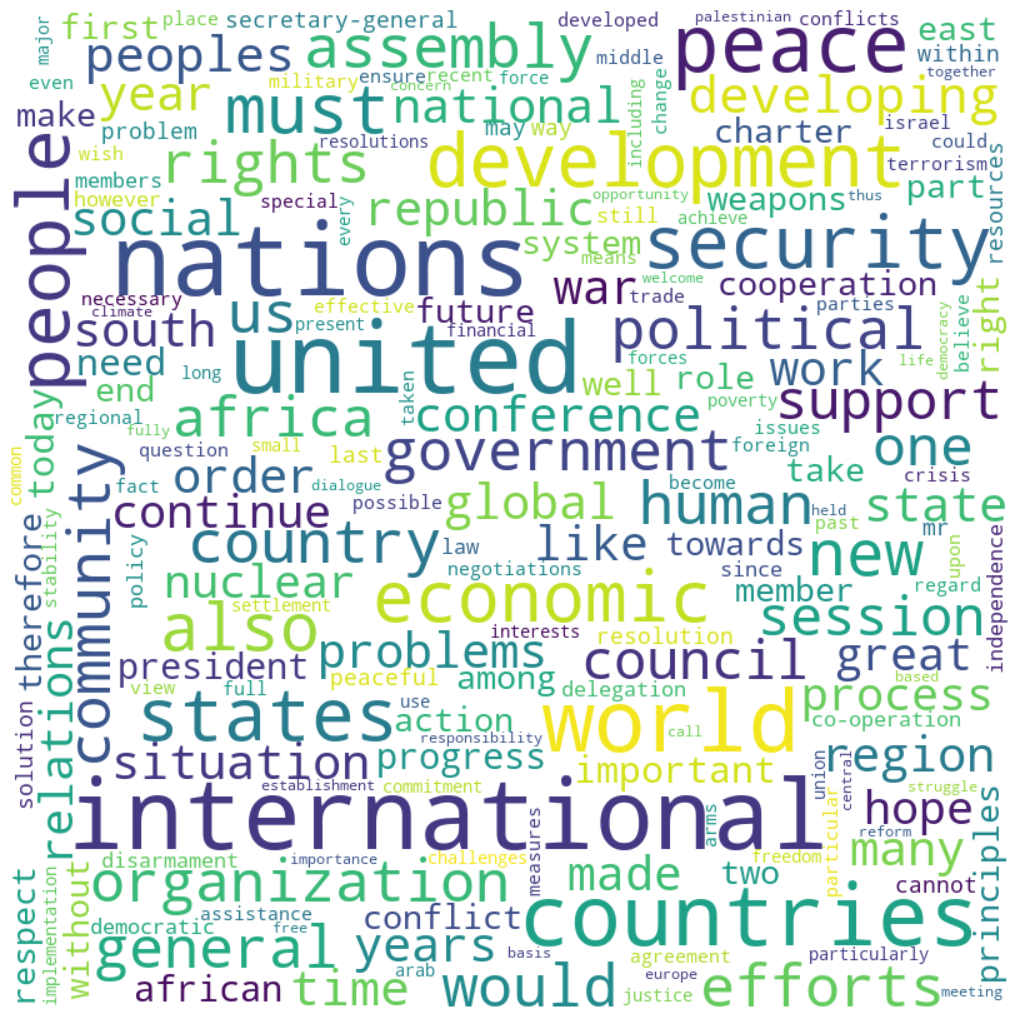

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object with desired parameters
wc = WordCloud(background_color='white', width=800, height=800, margin=2, max_font_size=80, min_font_size=10)

# Generate word cloud from the frequency dictionary
wc.generate_from_frequencies(freq_df['freq'])

# Plot the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')  # Improving interpolation for smoother image
plt.axis("off")
plt.tight_layout(pad=0)

# Saving the word cloud as an image (optional)
# plt.savefig('wordcloud.png', dpi=300)

plt.show()

In [11]:
import numpy as np
import pandas as pd
from collections import Counter

def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    counter = Counter()

    def update(doc):
        nonlocal counter
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))

    df[column].map(update)

    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df) / idf_df['df']) + 0.1
    idf_df.index.name = 'token'

    return idf_df

idf_df = compute_idf(df) 

In [12]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


## Wordcloud

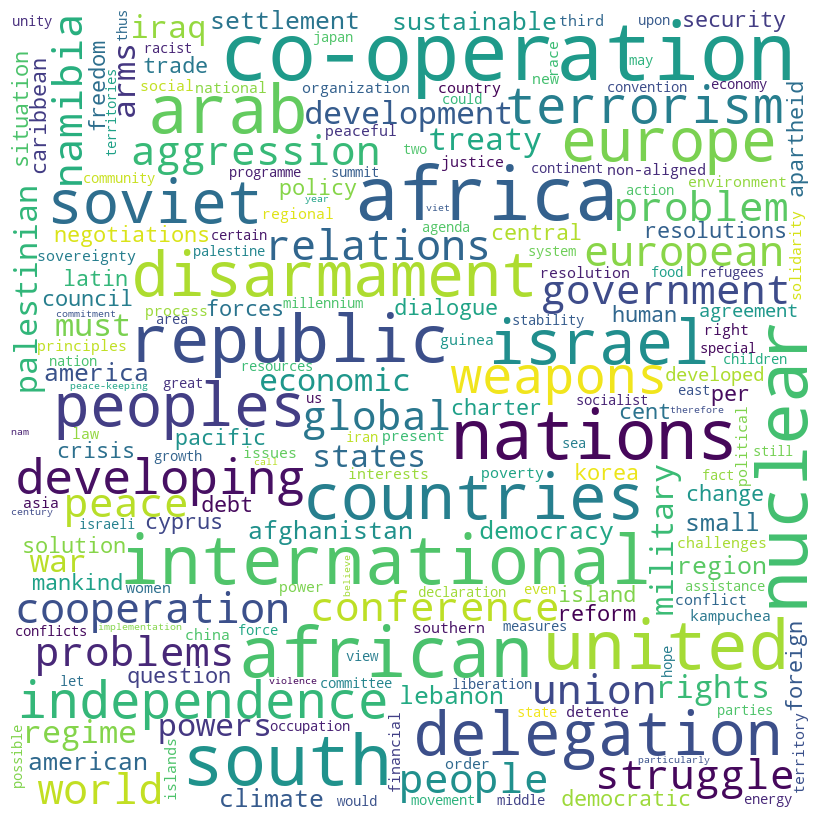

In [13]:
wc = WordCloud(background_color='white', width=800, height=800, margin=2, max_font_size=80, min_font_size=10)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Keyword Analysis by Year 

In [14]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


In [15]:
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

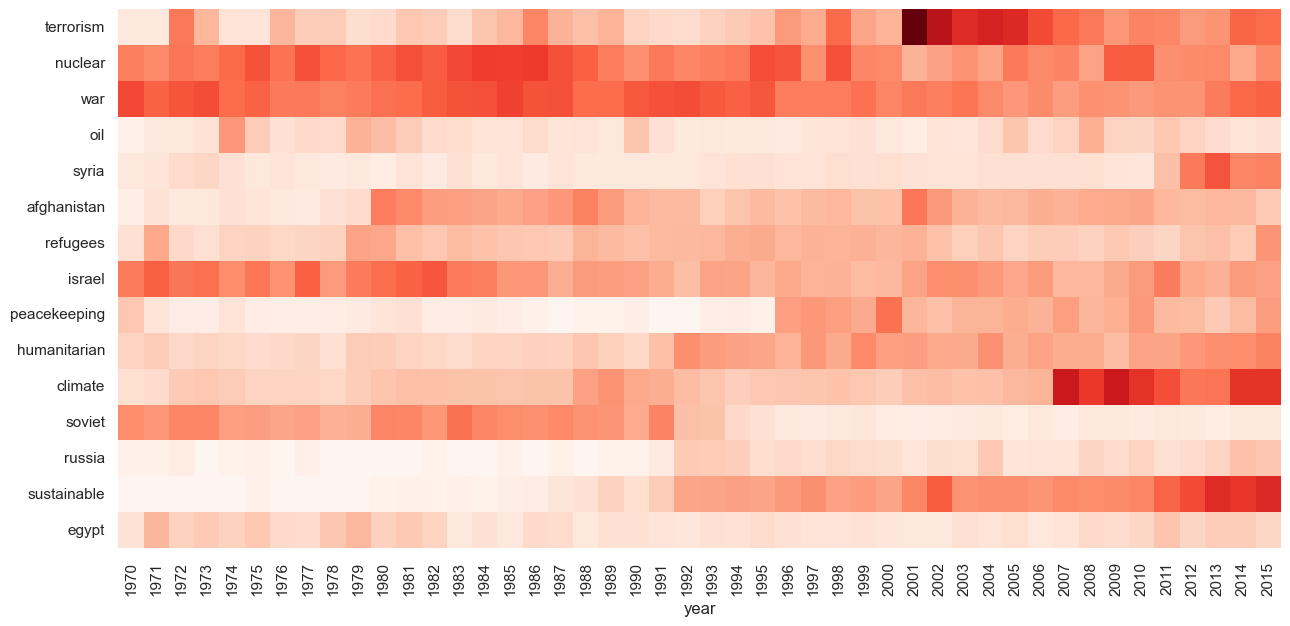

In [16]:
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil','syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping','humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T,xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)

## 1970

In [17]:
file ="C:\\Users\\tejag\\Downloads\\un-general-debates-blueprint (1).csv" 
df = pd.read_csv(file)
df= df[df['year']==1970]
df.head(20)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


In [18]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text 
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [19]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,1997
united,1996
international,1251
world,1093
peace,970
countries,908
states,896
organization,762
would,677


## Wordcloud

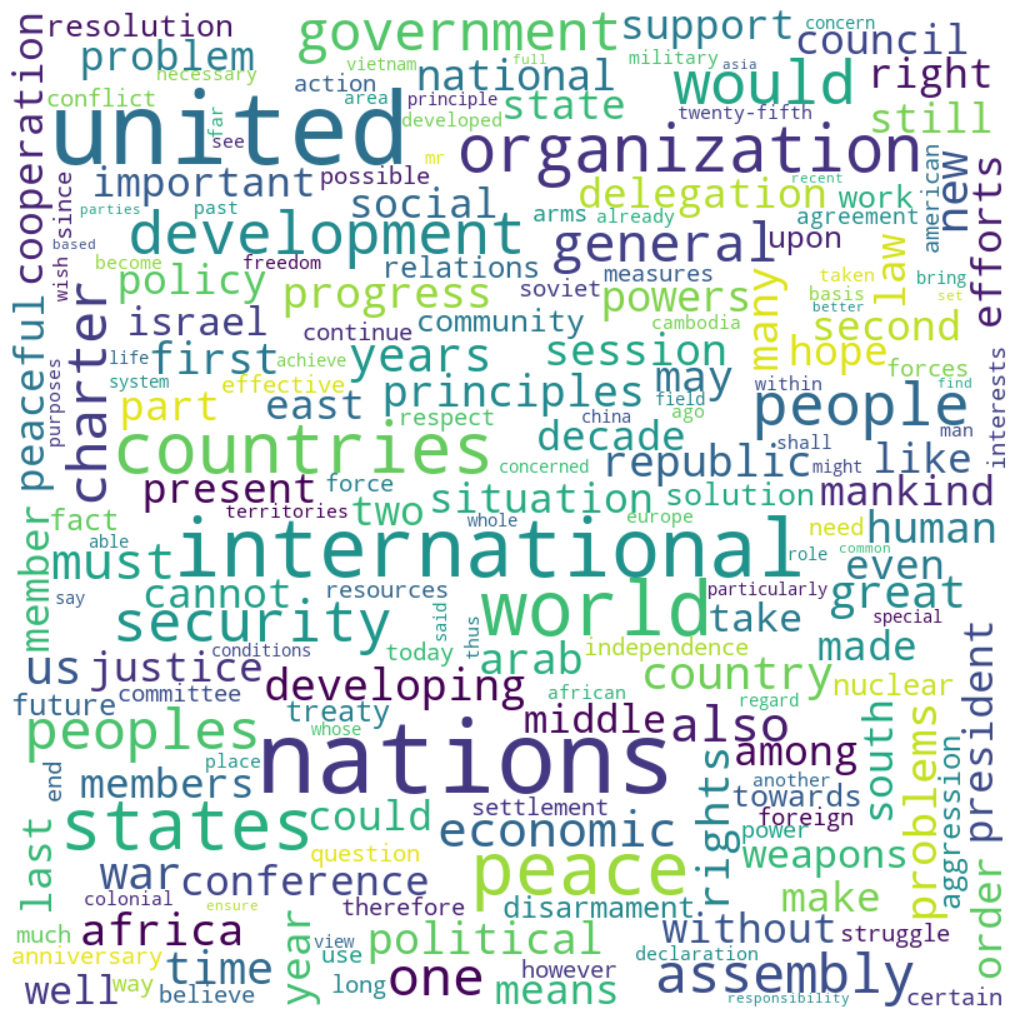

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object with desired parameters
wc = WordCloud(background_color='white', width=800, height=800, margin=2, max_font_size=80, min_font_size=10)

# Generate word cloud from the frequency dictionary
wc.generate_from_frequencies(freq_df['freq'])

# Plot the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')  # Improving interpolation for smoother image
plt.axis("off")
plt.tight_layout(pad=0)

# Saving the word cloud as an image (optional)
# plt.savefig('wordcloud.png', dpi=300)

plt.show()

In [21]:
import numpy as np
import pandas as pd
from collections import Counter

def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    counter = Counter()

    def update(doc):
        nonlocal counter
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))

    df[column].map(update)

    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df) / idf_df['df']) + 0.1
    idf_df.index.name = 'token'

    return idf_df

idf_df = compute_idf(df) 

In [22]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,1997,199.7
united,1996,199.6
international,1251,125.1
world,1093,109.3
peace,970,97.0


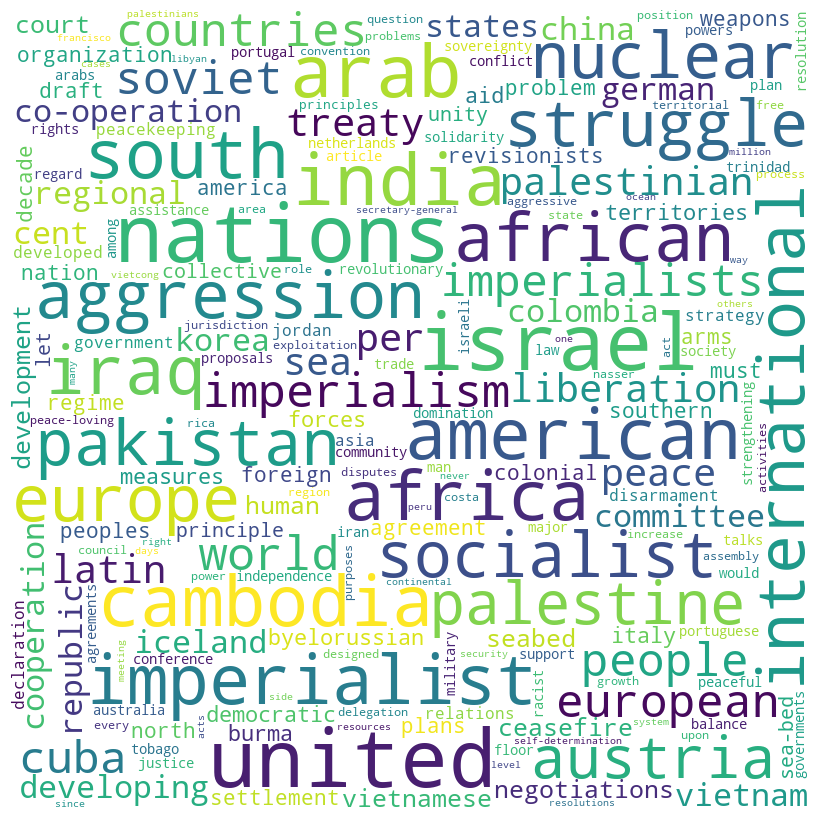

In [23]:
wc = WordCloud(background_color='white', width=800, height=800, margin=2, max_font_size=80, min_font_size=10)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Keyword Analysis for Year 1970

In [24]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


In [25]:
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

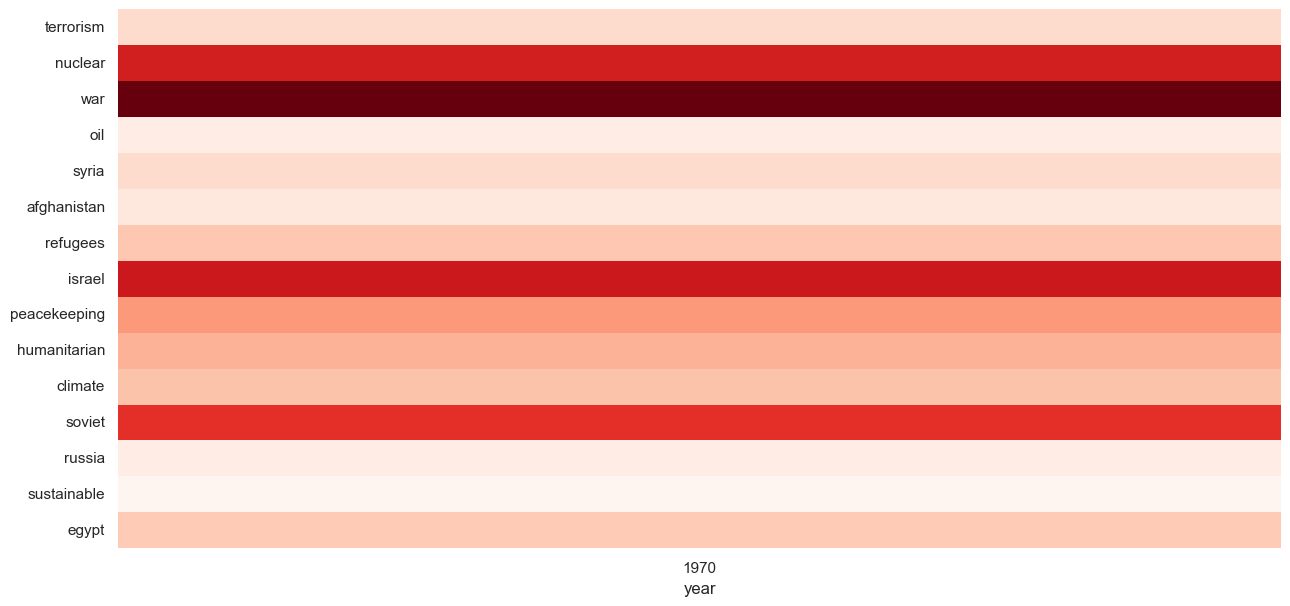

In [26]:
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil','syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping','humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T,xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)

## 2015

In [27]:
import pandas as pd
file = "C:\\Users\\tejag\\Downloads\\un-general-debates-blueprint (1).csv"
df = pd.read_csv(file)
df= df[df['year']==2015]
df.head(20)

,session,year,country,country_name,speaker,position,text
7314,70,2015,AFG,Afghanistan,Mr. Abdullah Abdullah,Chief Executive Officer,"It gives me great pleasure, on behalf of the I..."
7315,70,2015,AGO,Angola,Mr. Manuel Domingos Vicente,vice-President,"At the outset, on behalf of the President of A..."
7316,70,2015,ALB,Albania,Mr. Edi Rama,Prime minister,"One year ago, Pope Francis began his visits ar..."
7317,70,2015,AND,Andorra,Mr. Antoni Martí Petit,Head of Government,"It is my honour to represent my country, the P..."
7318,70,2015,ARE,United Arab Emirates,Sheikh Abdullah Bin Zayed Al Nahyan,Minister for Foreign Affairs,It is my pleasure to congratulate Mr. Mogens L...
7319,70,2015,ARG,Argentina,Cristina Fernández,President,"At the outset, allow me to welcome a very rele..."
7320,70,2015,ARM,Armenia,Mr. Serzh Sargsyan,President,"I congratulate you, Mr. President, on your ele..."
7321,70,2015,ATG,Antigua and Barbuda,Mr. Gaston Alphonso Browne,Prime minister,"Democracy, peace, security, rule of law and re..."
7322,70,2015,AUS,Australia,Ms. Julie Bishop,Minister for Foreign Affairs,We meet this day at an important time for the ...
7323,70,2015,AUT,Austria,Mr. Sebastian Kurz,Minister for Foreign Affairs,"Seventy years ago, the United Nations was foun..."


In [28]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text 
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [29]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,2587
united,2571
development,1754
international,1727
world,1635
security,1391
peace,1281
people,1229
countries,1086


## Wordcloud

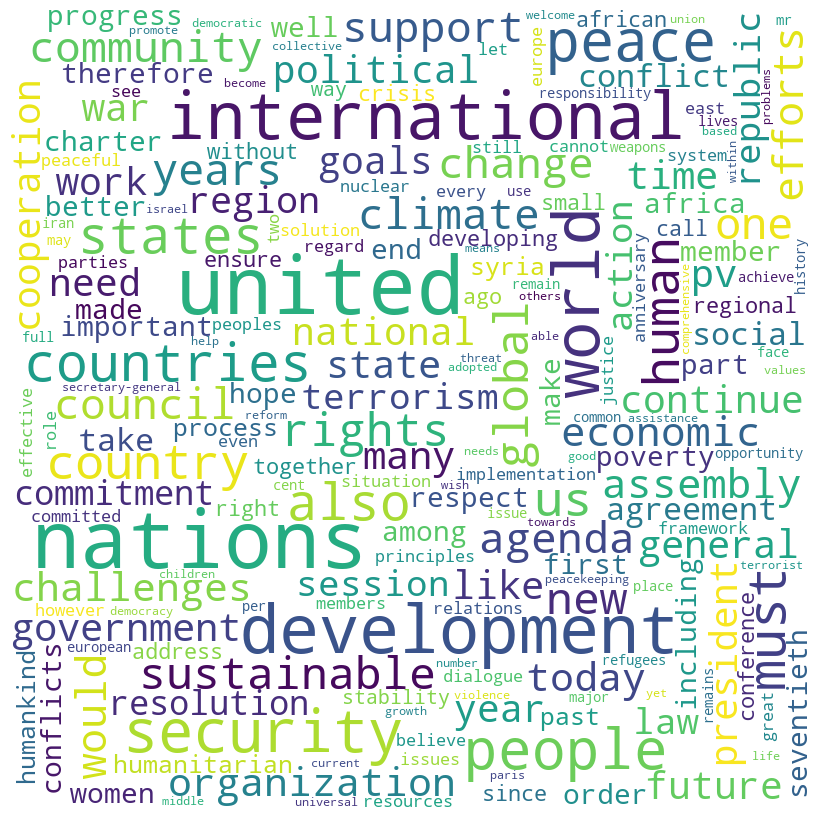

In [30]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width=800, height=800, margin=2, max_font_size=80, min_font_size=10)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [32]:
import numpy as np
import pandas as pd
from collections import Counter

def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    counter = Counter()

    def update(doc):
        nonlocal counter
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))

    df[column].map(update)

    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df) / idf_df['df']) + 0.1
    idf_df.index.name = 'token'

    return idf_df

idf_df = compute_idf(df) 


In [33]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,2587,258.700000
united,2571,257.100000
development,1754,249.654474
international,1727,208.868861
world,1635,180.531404


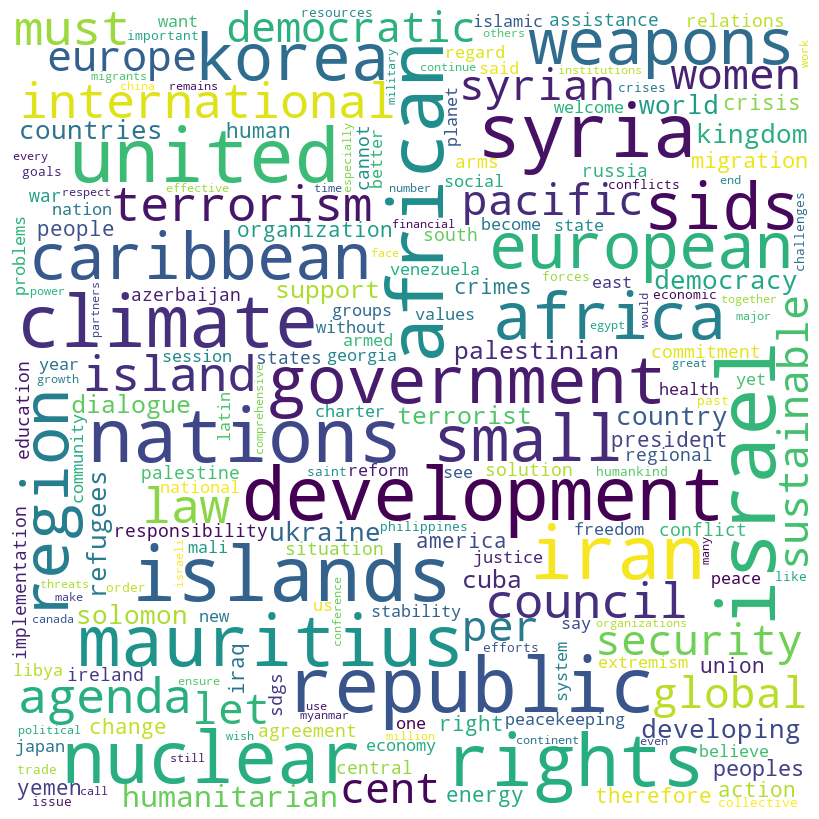

In [34]:
wc = WordCloud(background_color='white', width=800, height=800, margin=2, max_font_size=80, min_font_size=10)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Keyword Analysis for year 2015

In [35]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


In [36]:
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

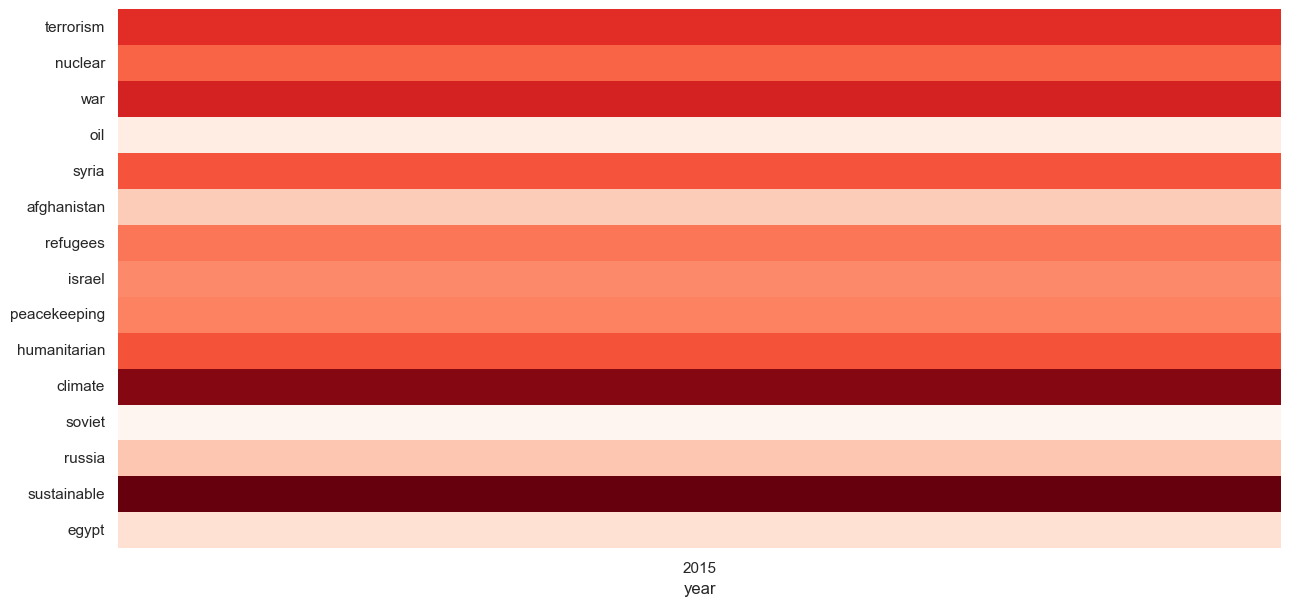

In [37]:
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil','syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping','humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T,xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)